In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [9]:
import h5py

In [10]:
# read in data
with h5py.File('../rom/eim-data.h5', 'r') as h5f:
    x = h5f['0'][:,0] # all data are on the same x-grid
    ys = np.zeros( shape=( len(h5f.keys()), len(x) ) )
    for k in h5f.keys():
        # need to do this becasuse dictionary keys are unordered list
        i = int(k)
        print(f"i={i}, k={k}")
        ys[i] = h5f[k][:,1]

i=0, k=0
i=1, k=1
i=10, k=10
i=2, k=2
i=3, k=3
i=4, k=4
i=5, k=5
i=6, k=6
i=7, k=7
i=8, k=8
i=9, k=9


In [11]:
x.shape

(11,)

In [12]:
ys.shape

(11, 11)

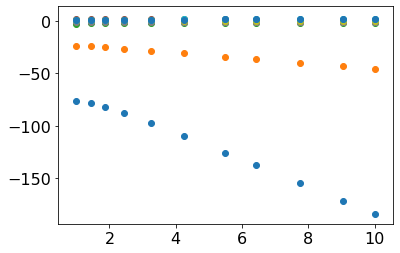

In [13]:
plt.figure()
for y in ys:
    plt.scatter(x, y)
# plt.ylim(-5,5)

In [86]:
sc = StandardScaler()
X_train = sc.fit_transform(x.reshape(-1,1))
# X_train = x.reshape(-1,1)

In [87]:
y_train = np.row_stack((ys[0], ys[1]))

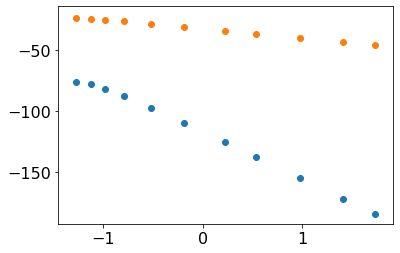

In [88]:
plt.figure()
plt.scatter(X_train, y_train[0])
plt.scatter(X_train, y_train[1])

In [89]:
import sys
sys.path.append('../rom')

In [90]:
# compare with linear regression

In [91]:
import fitslr

In [92]:
lr0 = fitslr.LinearPolynomialBasisRegression()

In [93]:
lr0.fit(X_train, y_train[0], method='direct', maxdegs=[4], max_deg_total=7)

In [94]:
lr0.predict(X_train)

array([ -75.50544209,  -96.81172614, -125.70003371, -154.62368808,
       -184.13178971,  -82.11514555,  -87.59549144,  -78.44591582,
       -109.27185393, -171.22427731, -137.6608554 ])

In [95]:
lr1 = fitslr.LinearPolynomialBasisRegression()

In [96]:
lr1.fit(X_train, y_train[1], method='direct', maxdegs=[4], max_deg_total=7)

In [97]:
lr1.predict(X_train)

array([-23.80379519, -28.36273939, -34.21308623, -39.95474042,
       -45.79358028, -25.27645672, -26.44404596, -24.47331425,
       -30.90783835, -43.23538727, -36.59589578])

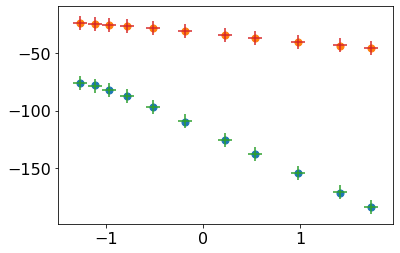

In [98]:
plt.figure()
plt.scatter(X_train, y_train[0], s=50)
plt.scatter(X_train, y_train[1], s=50)
plt.scatter(X_train, lr0.predict(X_train), marker='+', s=200)
plt.scatter(X_train, lr1.predict(X_train), marker='+', s=200)

In [99]:
sc.inverse_transform(X_train)

array([[ 1.        ],
       [ 3.25      ],
       [ 5.5       ],
       [ 7.75      ],
       [10.        ],
       [ 1.8798321 ],
       [ 2.4372534 ],
       [ 1.4394531 ],
       [ 4.24390054],
       [ 9.04943912],
       [ 6.41898683]])

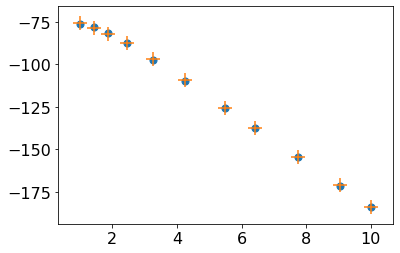

In [100]:
plt.scatter(sc.inverse_transform(X_train), y_train[0], s=50)
plt.scatter(sc.inverse_transform(X_train), lr0.predict(X_train), marker='+', s=200)